In [451]:
import numpy as np
import matplotlib.pyplot as plt

In [452]:
#symmetric 4x4 matrix
A =  np.array([[1, 2, 3, 4], [2, 3, -1, 5], [3, -1, 5, -6], [4, 5, -6, 7]])
A

array([[ 1,  2,  3,  4],
       [ 2,  3, -1,  5],
       [ 3, -1,  5, -6],
       [ 4,  5, -6,  7]])

In [453]:
def powerIteration(A, n=20):
    x = np.random.rand(A.shape[0])
    x = x / np.linalg.norm(x)

    lambdas = []

    for i in range(n):
        x = A @ x
        x = x / np.linalg.norm(x)

        lam= x.T @ A @ x
        lambdas.append(lam)

    return x, lambdas[-1], lambdas

In [454]:
x_power,lambda_power, lambdas_power = powerIteration(A)
x_power

array([ 0.18254923,  0.4078868 , -0.471836  ,  0.76004929])

In [455]:
#check if eigenvector is correct
print(A @ x_power)
print(lambda_power * x_power)
np.allclose(A @ x_power, lambda_power * x_power)

[ 2.62301199  5.86084132 -6.77971488 10.92099196]
[ 2.62301234  5.8608415  -6.77971448 10.92099202]


True

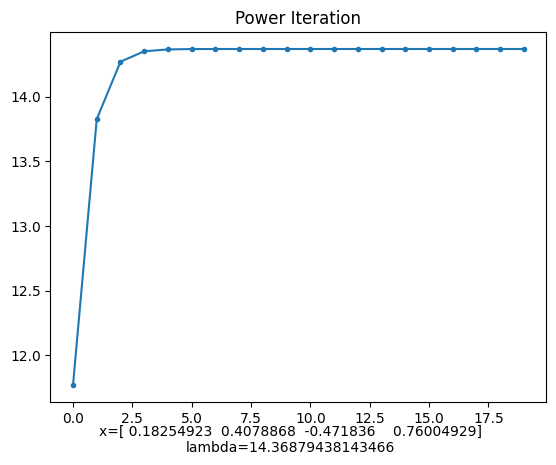

In [456]:
plt.plot(lambdas_power,'.-')
plt.title("Power Iteration")

plt.figtext(0.5, 0.01, "x=" + str(x_power)+"\nlambda="+ str(lambda_power), wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


In [457]:
import scipy


def inverseIteration(A,mu, n=20):
    x = np.random.rand(A.shape[0])
    x = x / np.linalg.norm(x)

    lambdas = []

    Mat= A - mu * np.eye(A.shape[0])
    _,L,U = scipy.linalg.lu(Mat)

    for i in range(n):
        y = scipy.linalg.solve_triangular(L, x, lower=True)
        omega = scipy.linalg.solve_triangular(U, y, lower=False)

        x = omega / np.linalg.norm(omega)

        lam= x.T @ A @ x
        lambdas.append(lam)

    return x, lambdas[-1], lambdas

In [458]:
x_inv,lambda_inv, lambdas_inv = inverseIteration(A,-8)
x_inv

array([ 0.63487879,  0.12444463, -0.52995301, -0.54826295])

In [459]:
#check if eigenvector is correct
print(A @ x_inv)
print(lambda_inv * x_inv)
np.allclose(A @ x_inv, lambda_inv * x_inv)

[-2.89914278 -0.56827025  2.42000436  2.50361576]
[-2.89914277 -0.56827026  2.42000436  2.50361576]


True

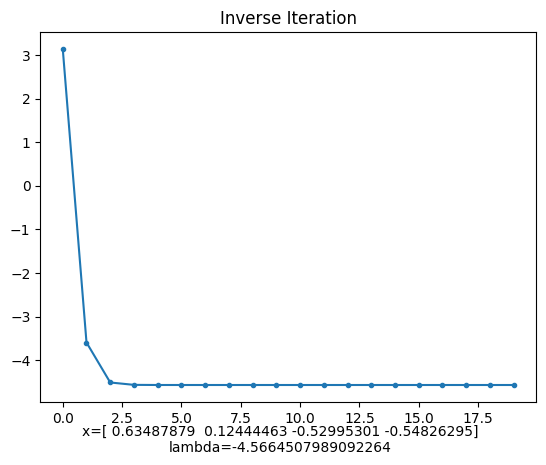

In [460]:
plt.plot(lambdas_inv,'.-')
plt.title("Inverse Iteration")

plt.figtext(0.5, 0.01, "x=" + str(x_inv)+"\nlambda="+ str(lambda_inv), wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

In [461]:
def rayleighQuotientIteration(A, n=20):
    x = np.random.rand(A.shape[0])
    x = x / np.linalg.norm(x)

    lambdas = []

    for i in range(n):
        mu = x.T @ A @ x
        Mat= A - mu * np.eye(A.shape[0])

        omega = np.linalg.solve(Mat, x)

        x = omega / np.linalg.norm(omega)

        lam= x.T @ A @ x
        lambdas.append(lam)

    return x, lambdas[-1], lambdas

In [462]:
x_ray,lambda_ray, lambdas_ray = rayleighQuotientIteration(A)
x_ray

array([-0.61674476, -0.33445423, -0.70411456, -0.10949411])

In [463]:
#check if eigenvector is correct
print(A @ x_ray)
print(lambda_ray * x_ray)
np.allclose(A @ x_ray, lambda_ray * x_ray)

[-3.83597335 -2.08020821 -4.37938816 -0.6810216 ]
[-3.83597335 -2.08020821 -4.37938816 -0.6810216 ]


True

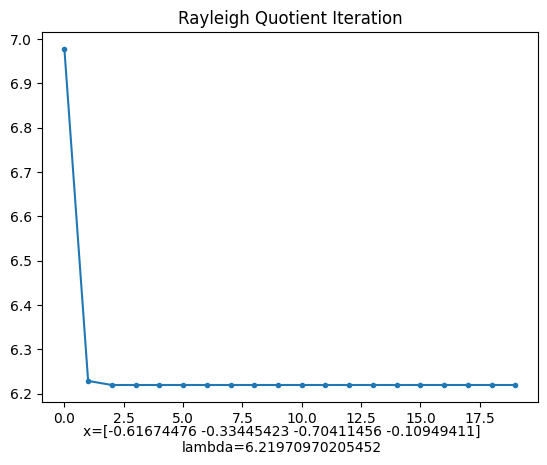

In [464]:
plt.plot(lambdas_ray, '.-')
plt.title("Rayleigh Quotient Iteration")

plt.figtext(0.5, 0.01, "x=" + str(x_ray)+"\nlambda="+ str(lambda_ray), wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


In [465]:
def QRIteration(A,n=50):

    lambdas = []

    for i in range(n):
        Q,R = np.linalg.qr(A)
        A = R @ Q
        lambdas.append(np.diag(A))

    return np.diag(A), lambdas

In [466]:
lambdas, lambdas_QR = QRIteration(A)
lambdas

array([14.36879438,  6.2197097 , -4.5664508 , -0.02205328])

In [467]:
#check if eigenvalues
print(lambdas)
print(np.linalg.eigvals(A))
np.allclose(lambdas, np.linalg.eigvals(A))

[14.36879438  6.2197097  -4.5664508  -0.02205328]
[14.36879438  6.2197097  -4.5664508  -0.02205328]


True

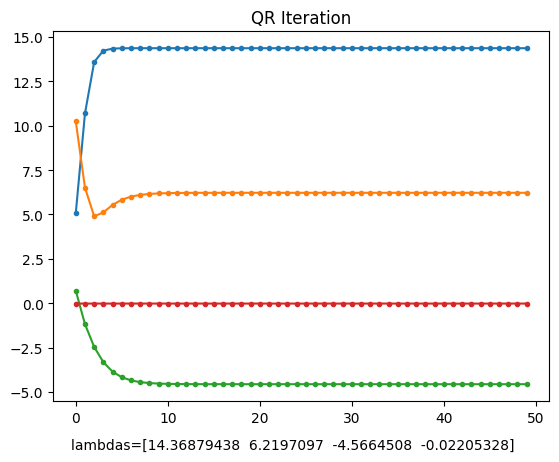

In [468]:
plt.plot(lambdas_QR,'.-')
plt.title("QR Iteration")

plt.figtext(0.5, 0.01, "lambdas=" + str(lambdas), wrap=True, horizontalalignment='center', fontsize=10)

plt.show()
